## Analyse GISAID statistics

In [8]:
import os
import sys

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

plt.rcParams["figure.dpi"] = 100

### Load

In [20]:
df = pd.read_csv("../data/WGS/5_GISAID/2021-01-01_gisaid.csv")
df["run"] = pd.Categorical(df["run"])

In [21]:
df.head()

,run,sample,sequencing_depth_avg,coverage_breadth,assembly_coverage_depth,number_base_pairs,consensus_genome_length,mean_contig_length,N50,ns_per_100kbp
0,C05,20131,451.118253,99.451542,453.606093,13489338,29738,29738.0,29738,558.472394
1,C05,245,356.056485,99.451542,358.020075,10646801,29738,29738.0,29738,558.472394
2,C05,140,345.405893,99.451542,347.310747,10328327,29738,29738.0,29738,558.472394
3,C05,18568,450.894321,99.451542,453.380927,13482642,29738,29738.0,29738,558.472394
4,C05,111,451.031202,99.451542,453.518562,13486735,29738,29738.0,29738,558.472394


### Tables

In [22]:
df.groupby("run").size()

run
C01     3
C02     3
C03    22
C05    23
C07    19
C08     4
C09    23
C10    24
C11    23
C12    23
C13    24
C14    23
C15    22
C16    24
C17    23
C18    23
dtype: int64

- Number of samples per run

In [23]:
df.groupby("run").mean()

,sequencing_depth_avg,coverage_breadth,assembly_coverage_depth,number_base_pairs,consensus_genome_length,mean_contig_length,N50,ns_per_100kbp
run,,,,,,,,
C01,253.406149,66.008963,255.936114,7.577351e+06,27366.333333,14958.500000,16450.000000,35123.566197
C02,430.948688,99.026821,432.685101,1.288623e+07,29782.000000,29782.000000,29782.000000,1238.474560
C03,273.487833,75.514560,275.380635,8.177833e+06,27324.590909,19290.692149,20289.409091,25962.533520
C05,398.699481,97.436990,400.981041,1.192191e+07,29700.565217,27693.929348,27832.086957,3163.998377
C07,335.649682,85.430652,337.590328,1.003660e+07,29649.210526,23915.650376,24104.000000,15683.554188
C08,114.335889,69.881613,115.035020,3.418872e+06,29541.750000,23922.000000,25790.500000,43641.106244
C09,373.099947,89.365696,375.163196,1.115643e+07,29448.304348,24245.885870,24698.391304,11301.102763
C10,177.783923,92.087764,178.764371,5.316095e+06,29738.000000,27003.576389,28155.833333,12247.143762
C11,348.550871,90.959017,350.545137,1.042237e+07,29596.260870,25926.939394,26728.130435,11520.124991


- Mean statistics per run

### Plots

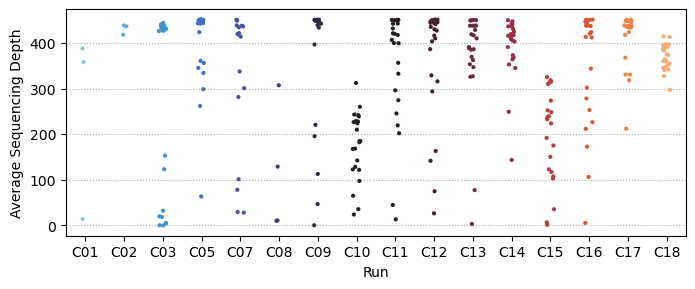

In [59]:
fig, ax = plt.subplots(1, 1, figsize=(8, 3))

sns.stripplot(x="run", 
              y="sequencing_depth_avg",
              s=3.0, palette="icefire",
              data=df)

ax.set_ylabel("Average Sequencing Depth")
ax.set_xlabel("Run")
ax.grid(axis='y', linestyle='dotted')

- Notice that some runs have no samples

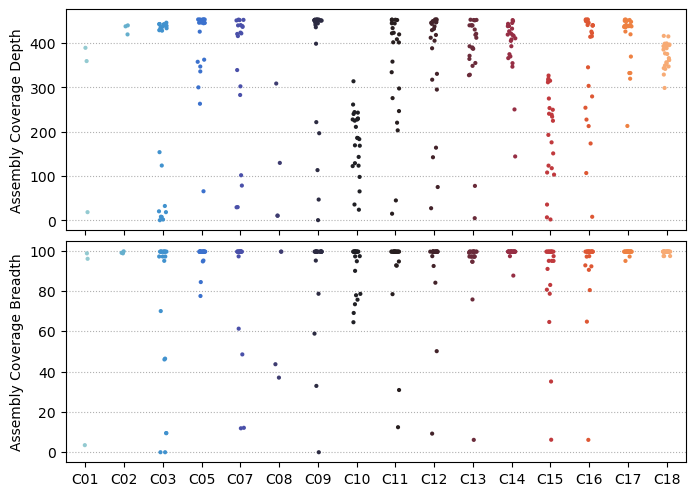

In [57]:
fig, ax = plt.subplots(2, 1, figsize=(8, 6), sharex=True)
fig.subplots_adjust(hspace=0.05)

# Depth
sns.stripplot(x="run", 
              y="assembly_coverage_depth",
              s=3.0, palette="icefire",
              data=df, ax=ax[0])

ax[0].set_ylabel("Assembly Coverage Depth")
ax[0].set_xlabel("")
ax[0].grid(axis='y', linestyle='dotted')

# Breadth
sns.stripplot(x="run", 
              y="coverage_breadth",
              s=3.0, palette="icefire",
              data=df, ax=ax[1])

ax[1].set_ylabel("Assembly Coverage Breadth")
ax[1].set_xlabel("")
ax[1].grid(axis='y', linestyle='dotted')

fig.savefig("gisaid_plot.jpg")

- The coverage peaks above the threshold of 400 due to the overlap at primer sites
  - Should these site be excluded from depth calculation?